In [1]:
# Importing necessary libraries
import pandas as pd
import zipfile
import os

# Unzipping the dataset
zip_file_path = 'Predicting Credit Card Customer Segmentation.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('./')

# Listing the extracted files
extracted_files = os.listdir('./')
extracted_files

['.ipynb_checkpoints',
 'BankChurners.csv',
 'Predicting Credit Card Customer Segmentation.zip',
 'Untitled.ipynb']

In [2]:
# Loading the extracted CSV file to analyze its contents
# Checking the extracted files to identify the relevant dataset
bank_churners_file = 'BankChurners.csv'

# Reading the dataset into a DataFrame
bank_churners_df = pd.read_csv(bank_churners_file)

# Displaying the head of the DataFrame to understand its structure
bank_churners_df_head = bank_churners_df.head()
bank_churners_df_head

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Checking for missing values and basic statistics of the dataset
missing_values = bank_churners_df.isnull().sum()
statistics_summary = bank_churners_df.describe(include='all')

# Displaying the missing values and statistics summary
missing_values, statistics_summary

(CLIENTNUM                                                                                                                             0
 Attrition_Flag                                                                                                                        0
 Customer_Age                                                                                                                          0
 Gender                                                                                                                                0
 Dependent_count                                                                                                                       0
 Education_Level                                                                                                                       0
 Marital_Status                                                                                                                        0
 Income_Category                         

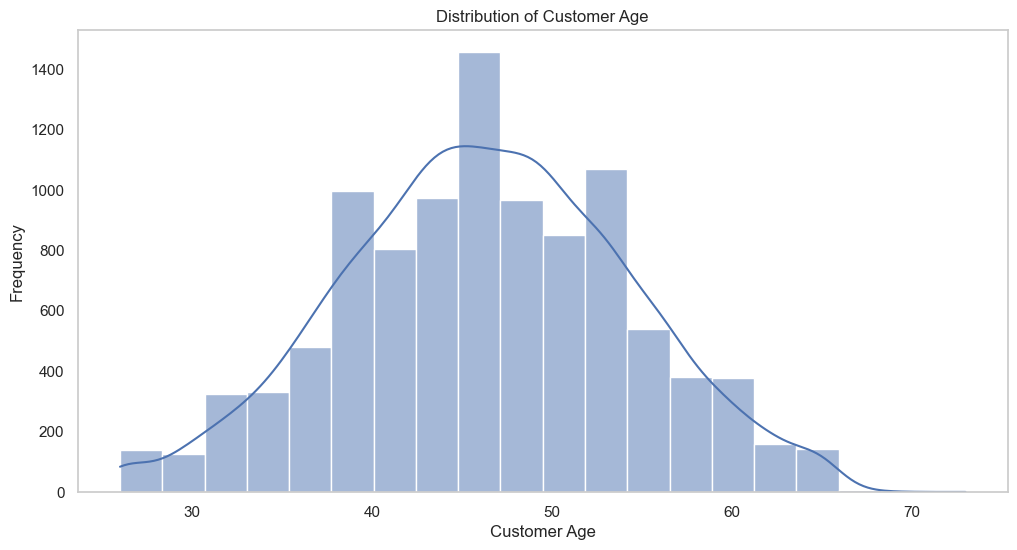

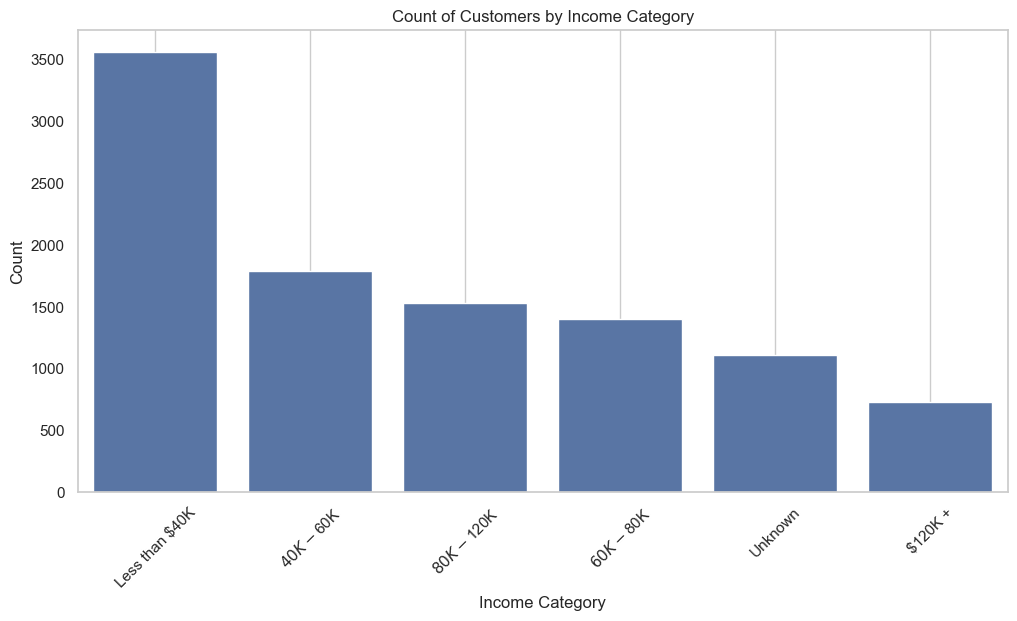

In [4]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set(style='whitegrid')

# Visualizing the distribution of Customer Age
plt.figure(figsize=(12, 6))
sns.histplot(bank_churners_df['Customer_Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Visualizing the count of customers by Income Category
plt.figure(figsize=(12, 6))
sns.countplot(data=bank_churners_df, x='Income_Category', order=bank_churners_df['Income_Category'].value_counts().index)
plt.title('Count of Customers by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [5]:
# Calculating the correlation matrix
correlation_matrix = bank_churners_df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Existing Customer'

In [6]:
# Identifying numeric columns in the dataset
numeric_columns = bank_churners_df.select_dtypes(include=['number']).columns.tolist()

# Displaying the numeric columns
numeric_columns

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

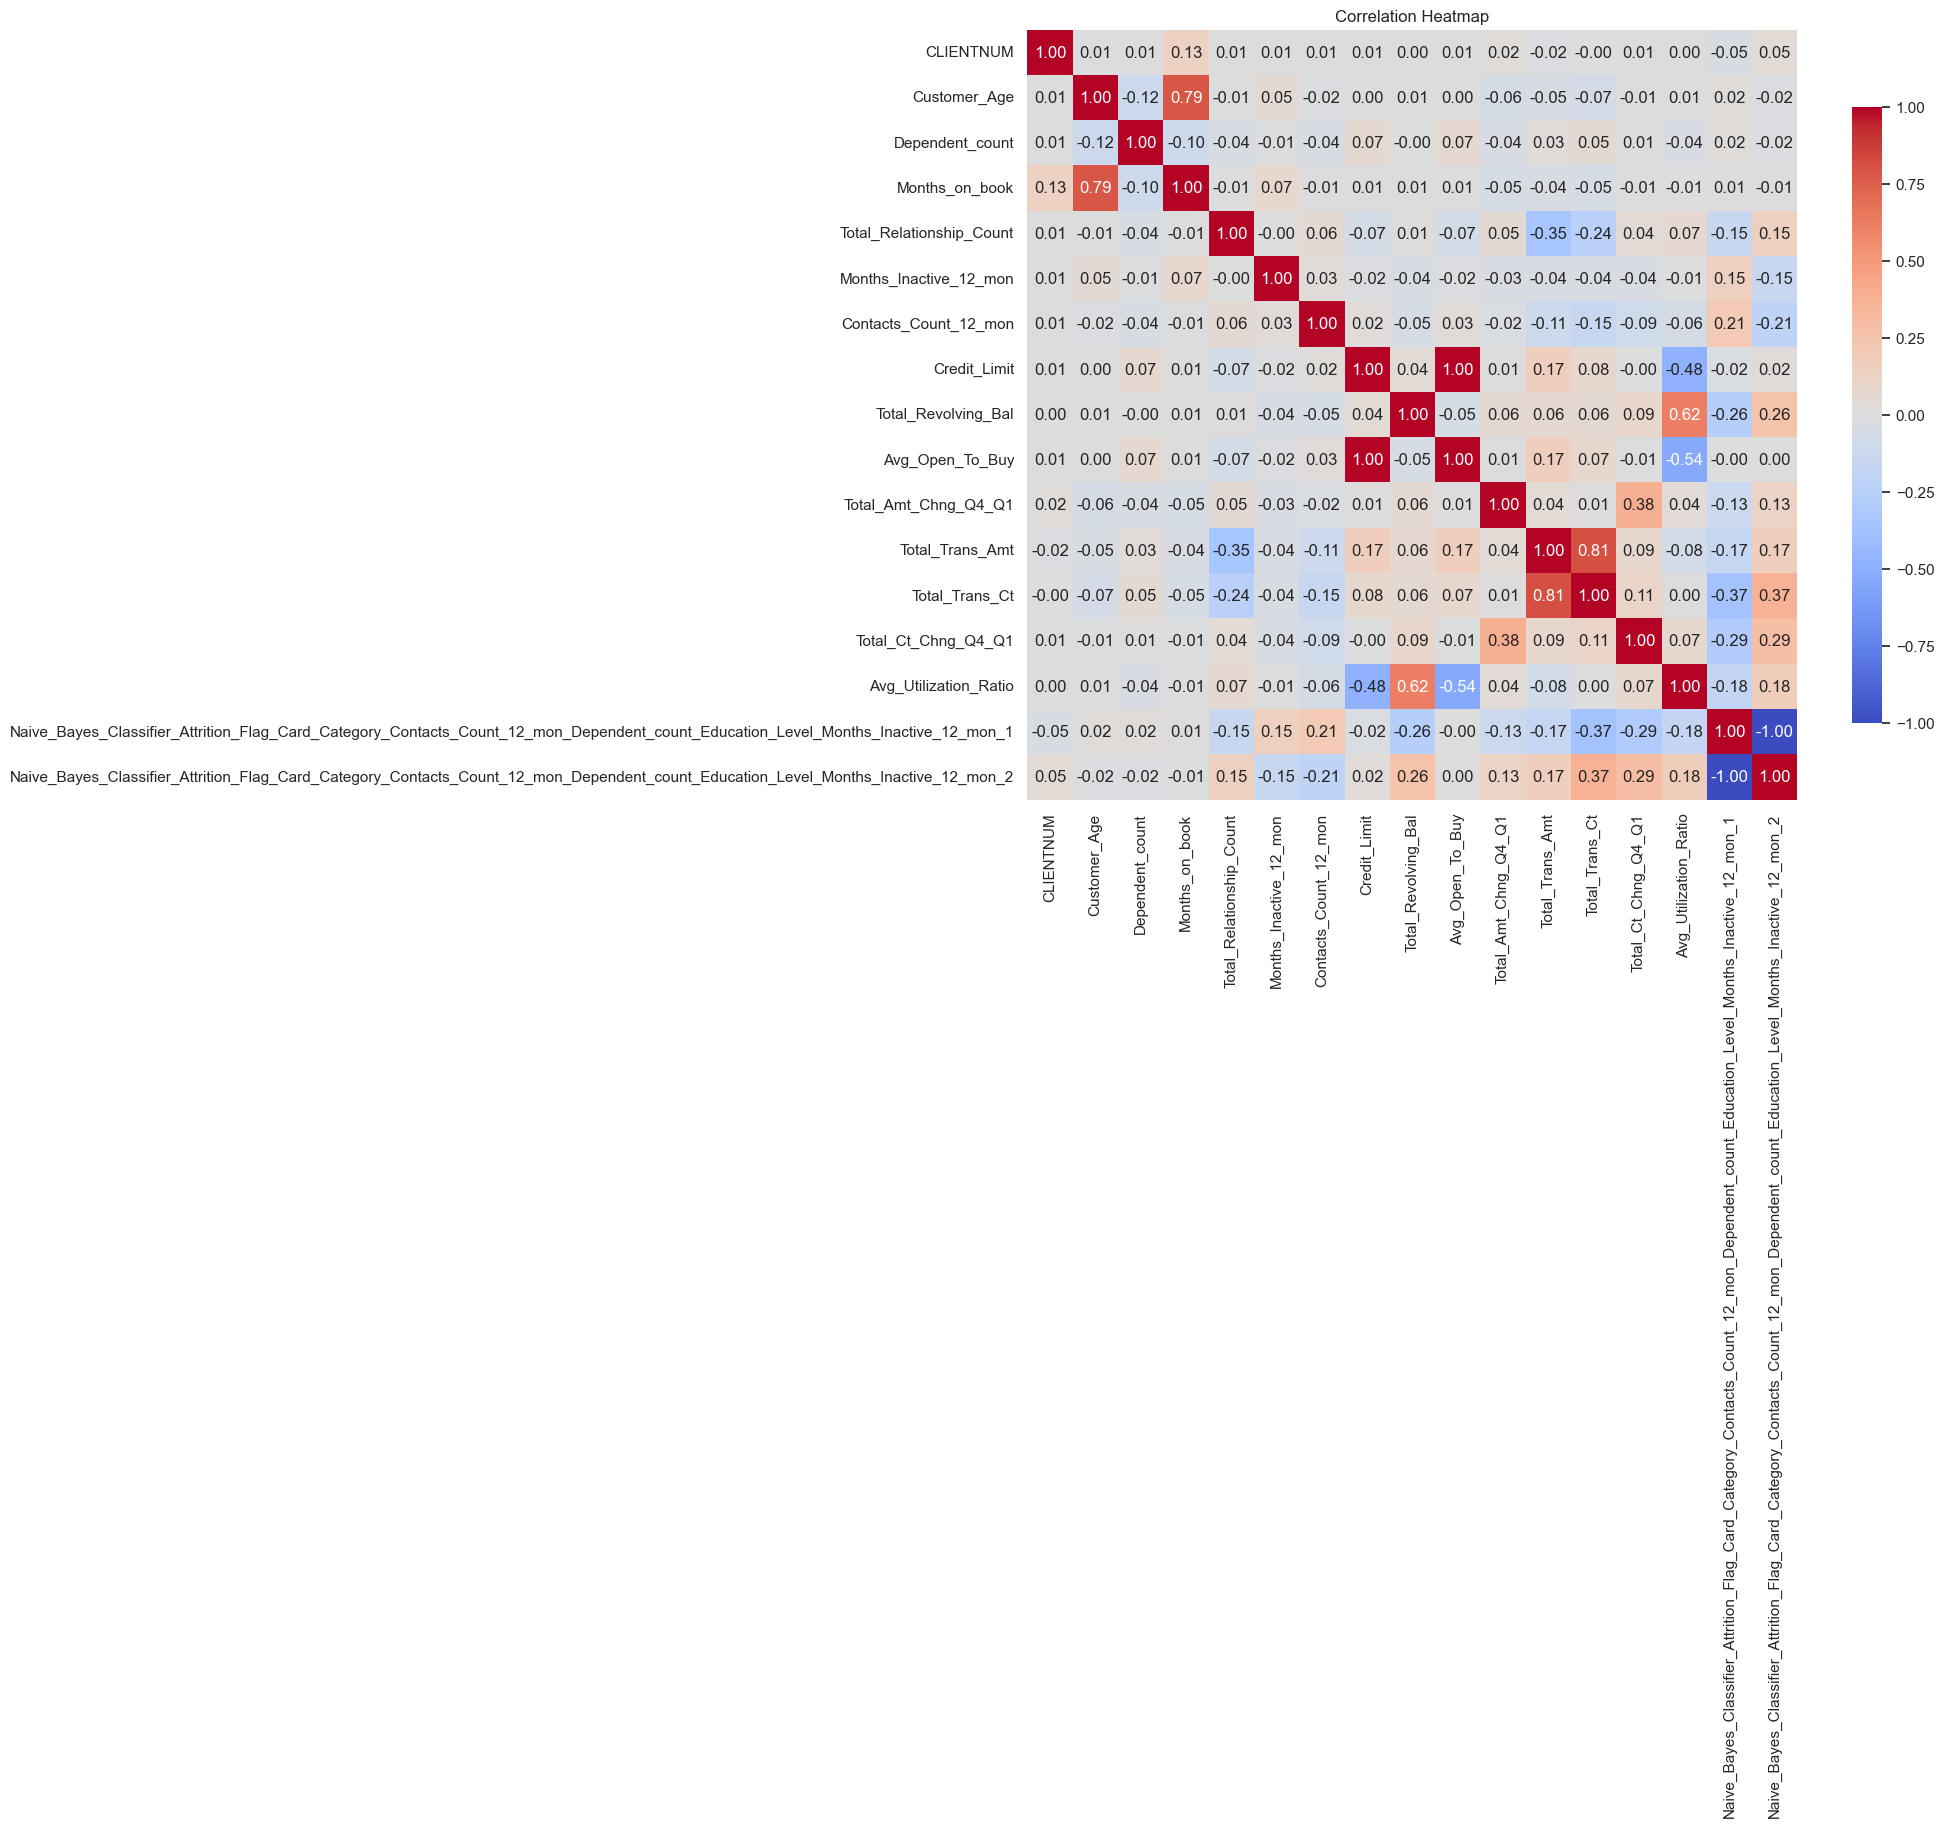

In [7]:
# Calculating the correlation matrix for numeric columns
correlation_matrix = bank_churners_df[numeric_columns].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')
plt.show()

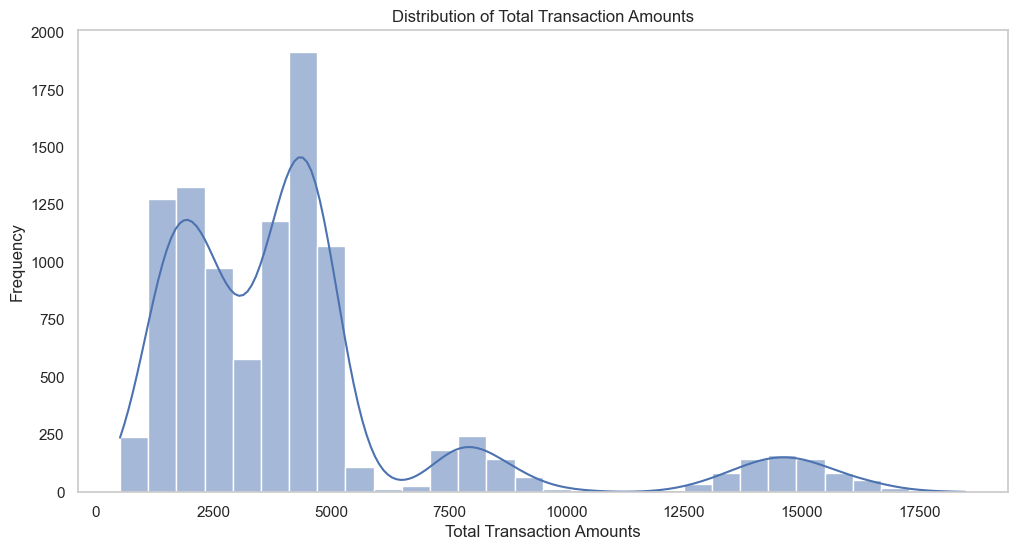

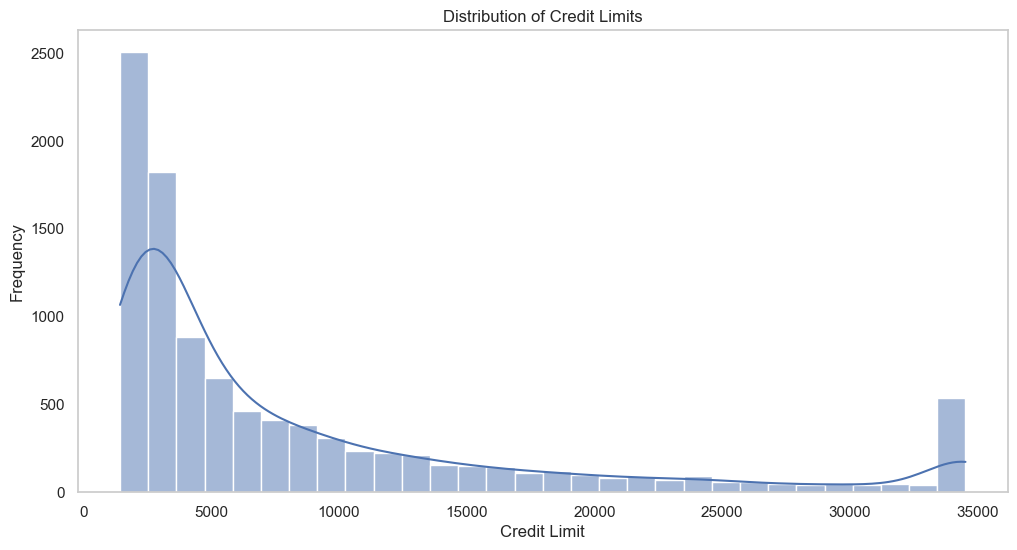

In [8]:
# Visualizing the distribution of Total Transaction Amounts
plt.figure(figsize=(12, 6))
sns.histplot(bank_churners_df['Total_Trans_Amt'], bins=30, kde=True)
plt.title('Distribution of Total Transaction Amounts')
plt.xlabel('Total Transaction Amounts')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Visualizing the distribution of Credit Limits
plt.figure(figsize=(12, 6))
sns.histplot(bank_churners_df['Credit_Limit'], bins=30, kde=True)
plt.title('Distribution of Credit Limits')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.grid()
plt.show()

C:\Users\ABOR\AppData\Local\Temp\ipykernel_10384\3257573984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_churners_df, x='Attrition_Flag', y='Total_Trans_Amt', palette='Set2')


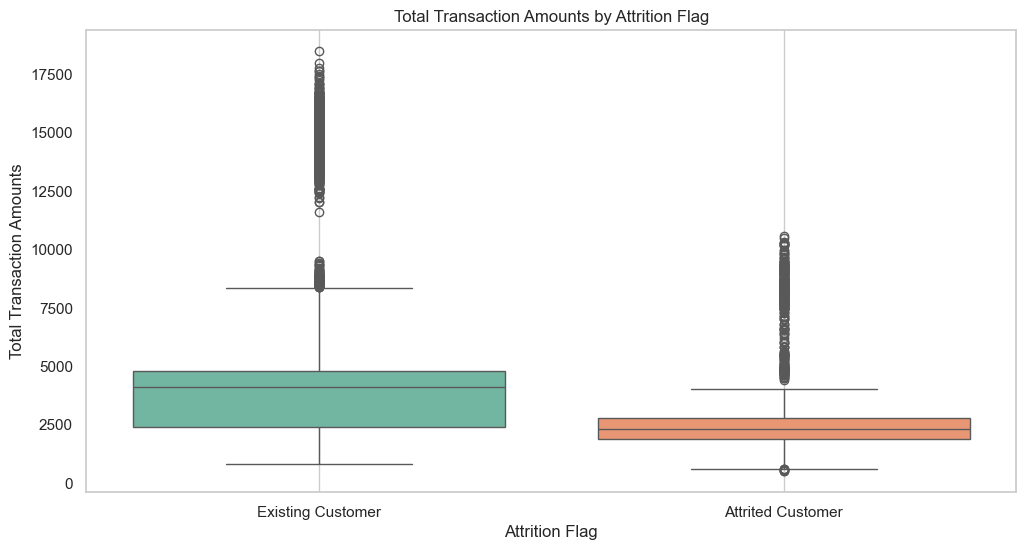

C:\Users\ABOR\AppData\Local\Temp\ipykernel_10384\3257573984.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_churners_df, x='Attrition_Flag', y='Credit_Limit', palette='Set2')


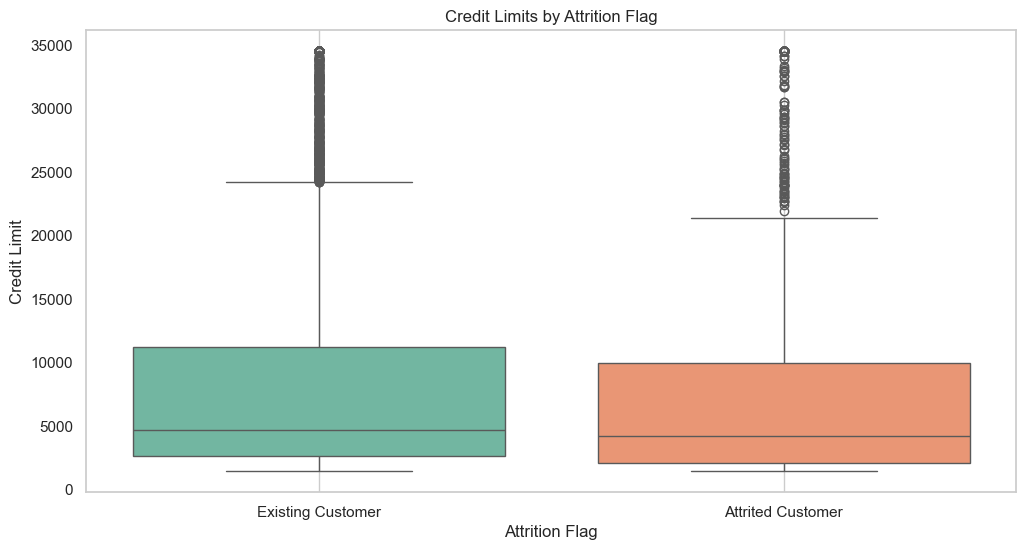

In [9]:
# Visualizing the relationship between Total Transaction Amounts and Attrition Flag
plt.figure(figsize=(12, 6))
sns.boxplot(data=bank_churners_df, x='Attrition_Flag', y='Total_Trans_Amt', palette='Set2')
plt.title('Total Transaction Amounts by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Total Transaction Amounts')
plt.grid()
plt.show()

# Visualizing the relationship between Credit Limits and Attrition Flag
plt.figure(figsize=(12, 6))
sns.boxplot(data=bank_churners_df, x='Attrition_Flag', y='Credit_Limit', palette='Set2')
plt.title('Credit Limits by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Credit Limit')
plt.grid()
plt.show()

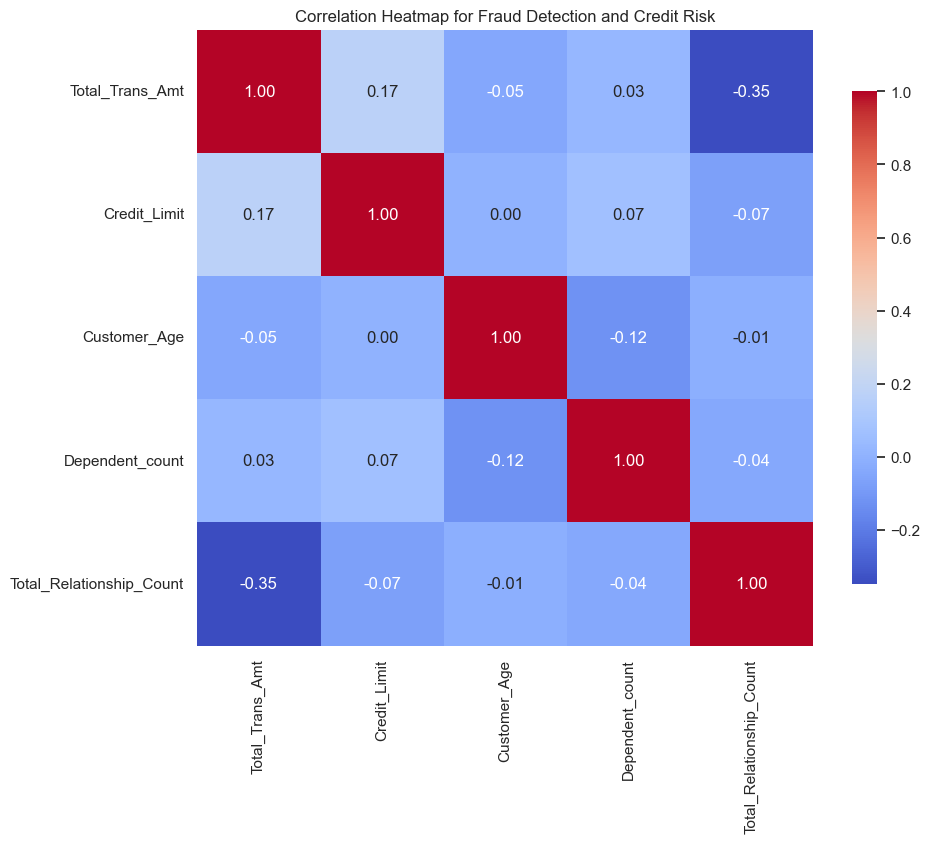

In [10]:
# Calculating the correlation matrix for relevant features related to fraud detection and credit risk
relevant_columns = ['Total_Trans_Amt', 'Credit_Limit', 'Customer_Age', 'Dependent_count', 'Total_Relationship_Count']
correlation_matrix_risk = bank_churners_df[relevant_columns].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_risk, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap for Fraud Detection and Credit Risk')
plt.show()

C:\Users\ABOR\anaconda3\anaconda x2w\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ABOR\anaconda3\anaconda x2w\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ABOR\anaconda3\anaconda x2w\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ABOR\anaconda3\anaconda x2w\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ABOR\anaconda3\anaconda x2w\Lib\subprocess.py", line 1538

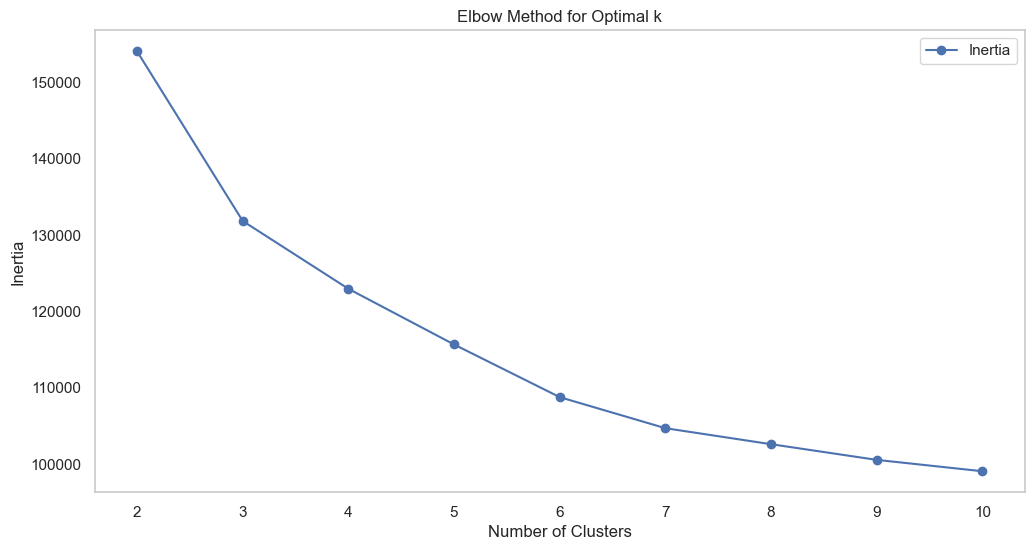

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardizing the relevant features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bank_churners_df[numeric_columns])

# Finding the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plotting the elbow method results
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, inertia, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.legend()
plt.show()

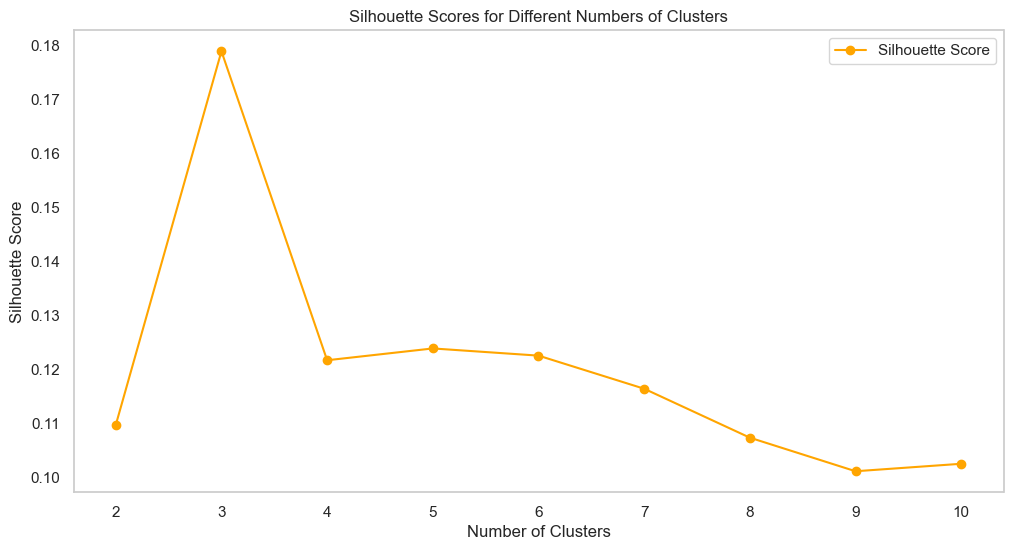

In [12]:
# Plotting the silhouette scores for different numbers of clusters
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.legend()
plt.show()

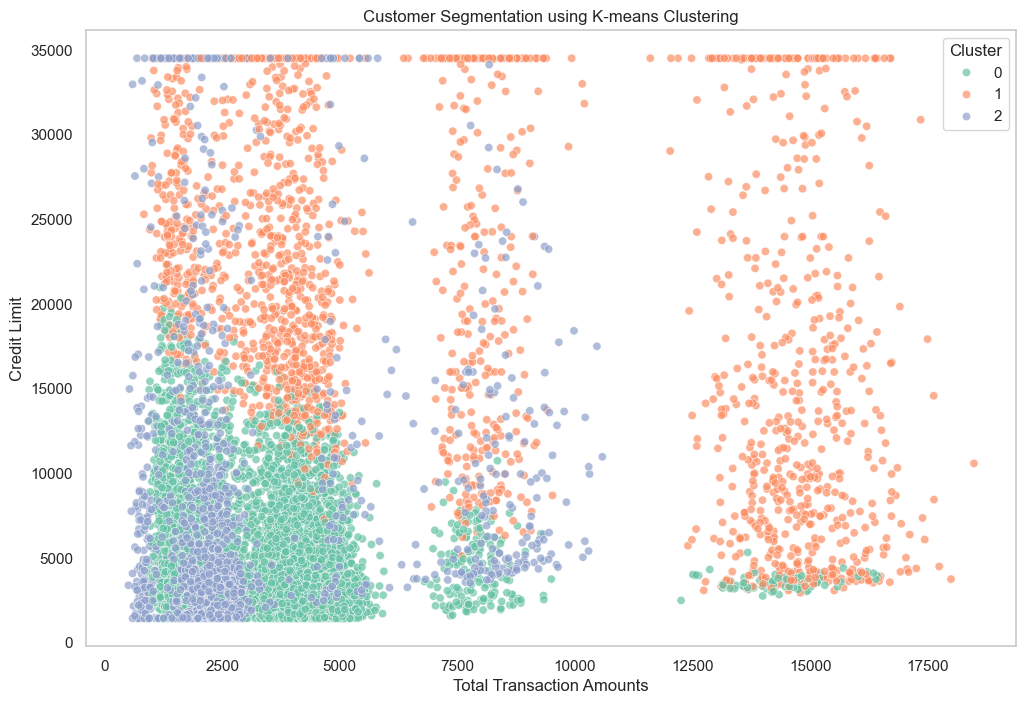

In [13]:
# Choosing the optimal number of clusters based on silhouette score
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts at 2

# Performing K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the original dataframe
bank_churners_df['Cluster'] = clusters

# Visualizing the clusters using a scatter plot of two selected features
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bank_churners_df, x='Total_Trans_Amt', y='Credit_Limit', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Total Transaction Amounts')
plt.ylabel('Credit Limit')
plt.grid()
plt.legend(title='Cluster')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Preparing the data for predictive modeling
# Selecting features and target variable
features = bank_churners_df.drop(columns=['Attrition_Flag', 'Cluster'])
target = bank_churners_df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited' else 0)  # Encoding target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fitting the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_model.predict(X_test)

# Generating the classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the classification report and confusion matrix
print(class_report)
print(conf_matrix)

ValueError: could not convert string to float: 'F'

In [15]:
# Checking the data types and unique values in the feature columns
feature_types = bank_churners_df.dtypes
unique_values = {col: bank_churners_df[col].unique() for col in bank_churners_df.columns if bank_churners_df[col].dtype == 'object'}

# Displaying the data types and unique values
print(feature_types)
print(unique_values)

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [17]:
# Applying one-hot encoding to categorical variables
bank_churners_encoded = pd.get_dummies(bank_churners_df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

# Preparing the data for predictive modeling again
features_encoded = bank_churners_encoded.drop(columns=['Attrition_Flag', 'Cluster'])
target_encoded = bank_churners_encoded['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)  # Encoding target variable

# Splitting the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

# Fitting the logistic regression model again
logistic_model_encoded = LogisticRegression(max_iter=1000)
logistic_model_encoded.fit(X_train_encoded, y_train_encoded)

# Making predictions on the test set
y_pred_encoded = logistic_model_encoded.predict(X_test_encoded)

# Generating the classification report and confusion matrix
class_report_encoded = classification_report(y_test_encoded, y_pred_encoded)
conf_matrix_encoded = confusion_matrix(y_test_encoded, y_pred_encoded)

# Displaying the classification report and confusion matrix
print(class_report_encoded)
print(conf_matrix_encoded)


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1699
           1       1.00      0.00      0.01       327

    accuracy                           0.84      2026
   macro avg       0.92      0.50      0.46      2026
weighted avg       0.86      0.84      0.77      2026

[[1699    0]
 [ 326    1]]


In [18]:
# Checking the distribution of the target variable
class_distribution = bank_churners_df['Attrition_Flag'].value_counts(normalize=True)

# Displaying the class distribution
print(class_distribution)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64


In [20]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features_encoded, target_encoded)

# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fitting the logistic regression model on the resampled data
logistic_model_resampled = LogisticRegression(max_iter=1000)
logistic_model_resampled.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred_resampled = logistic_model_resampled.predict(X_test_resampled)

# Generating the classification report and confusion matrix
class_report_resampled = classification_report(y_test_resampled, y_pred_resampled)
conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)

# Displaying the classification report and confusion matrix
print(class_report_resampled)
print(conf_matrix_resampled)


              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1676
           1       0.69      0.69      0.69      1724

    accuracy                           0.68      3400
   macro avg       0.68      0.68      0.68      3400
weighted avg       0.68      0.68      0.68      3400

[[1135  541]
 [ 535 1189]]


In [21]:
import imblearn
import sklearn

# Checking the installed versions of imblearn and sklearn
imblearn_version = imblearn.__version__
sklearn_version = sklearn.__version__

# Displaying the versions
print(f'imblearn version: {imblearn_version}')
print(f'sklearn version: {sklearn_version}')


imblearn version: 0.12.3
sklearn version: 1.5.1


In [22]:
import imblearn
import sklearn

# Checking the installed versions of imblearn and sklearn
imblearn_version = imblearn.__version__
sklearn_version = sklearn.__version__

# Displaying the versions
print(f'imblearn version: {imblearn_version}')
print(f'sklearn version: {sklearn_version}')


imblearn version: 0.12.3
sklearn version: 1.5.1


In [23]:
# Checking the installed versions of imblearn and sklearn
import imblearn
import sklearn

imblearn_version = imblearn.__version__
sklearn_version = sklearn.__version__

# Displaying the versions
print('imblearn version:', imblearn_version)
print('sklearn version:', sklearn_version)

imblearn version: 0.12.3
sklearn version: 1.5.1


In [ ]:
# Uninstalling the current versions of imblearn and sklearn
!pip uninstall imbalanced-learn -y
!pip uninstall scikit-learn -y

# Reinstalling compatible versions of imblearn and sklearn
!pip install imbalanced-learn==0.8.0
!pip install scikit-learn==1.0.2

Found existing installation: imbalanced-learn 0.12.3
Uninstalling imbalanced-learn-0.12.3:
  Successfully uninstalled imbalanced-learn-0.12.3
Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----------------------------

In [ ]:
# Re-importing necessary libraries after reinstalling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Applying SMOTE to balance the classes again
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features_encoded, target_encoded)

# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fitting the logistic regression model on the resampled data
logistic_model_resampled = LogisticRegression(max_iter=1000)
logistic_model_resampled.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
 y_pred_resampled = logistic_model_resampled.predict(X_test_resampled)

# Generating the classification report and confusion matrix
class_report_resampled = classification_report(y_test_resampled, y_pred_resampled)
conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)

# Displaying the classification report and confusion matrix
print(class_report_resampled)
print(conf_matrix_resampled)